In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#### Q1. Perform EDA on the given data. What does the primary analysis of several categorical features reveal?

In [12]:
df=pd.read_csv('bank.csv',sep=';')
pd.set_option('display.max_columns', None)

In [13]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [16]:
df.isnull().sum()   # No Null Values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [17]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols    #Identify Categorical Columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [18]:
# Removing Target Column
cat_cols.remove('y')

In [19]:
df['y'].value_counts(normalize=True) * 100  # Distribution of Target Variable

y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64

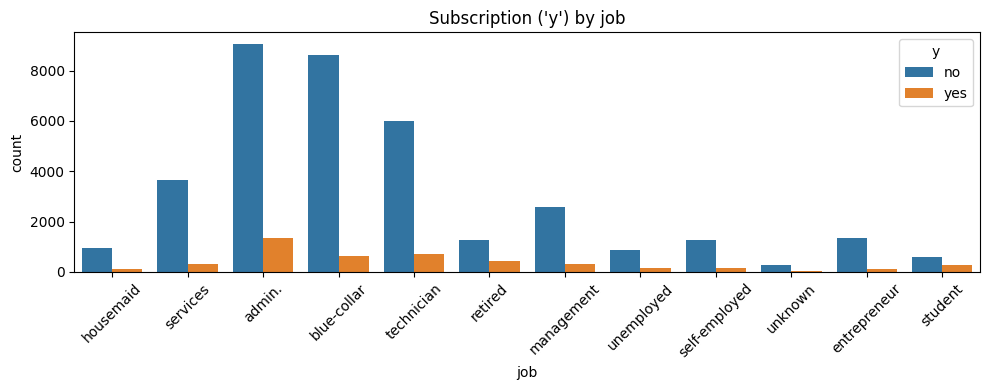

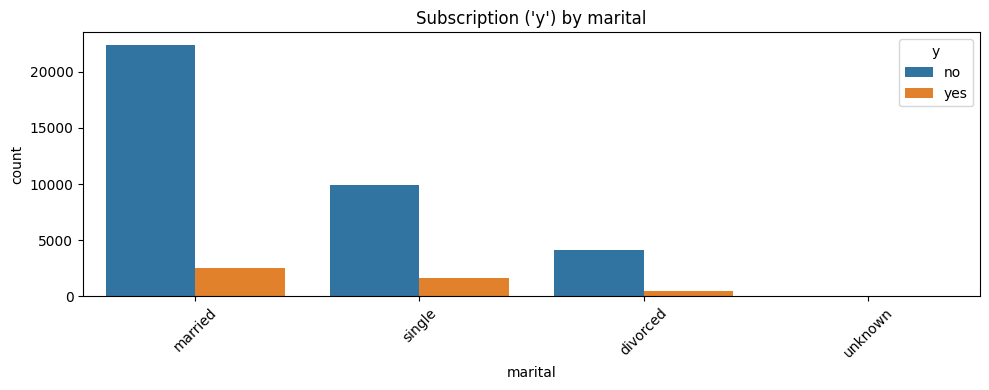

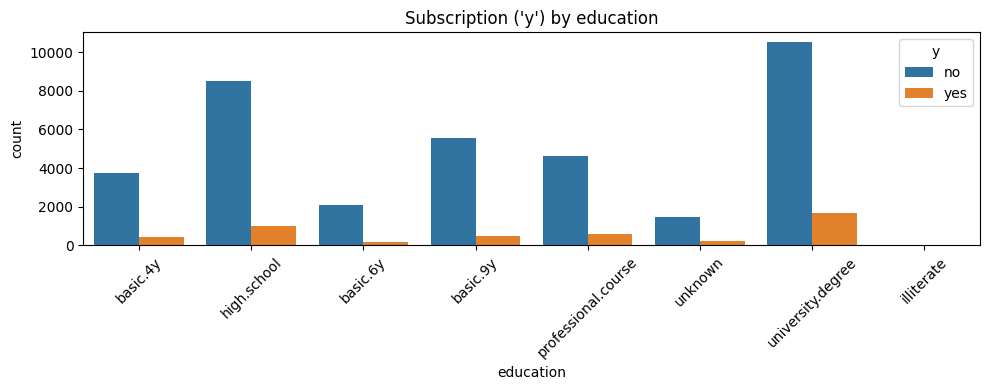

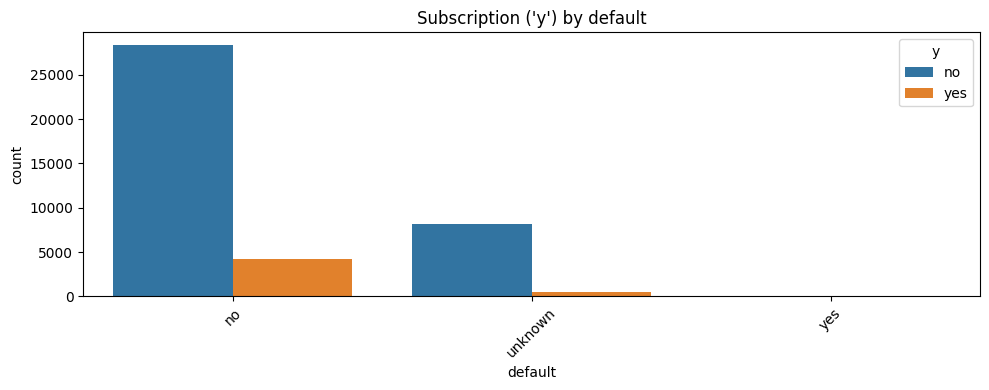

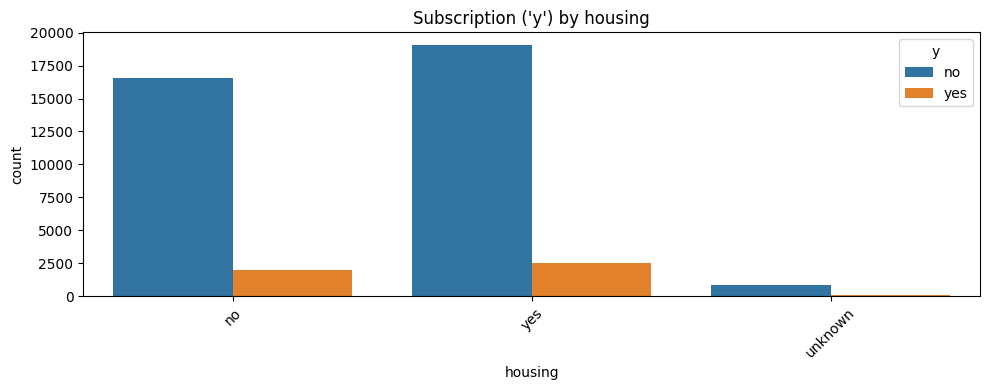

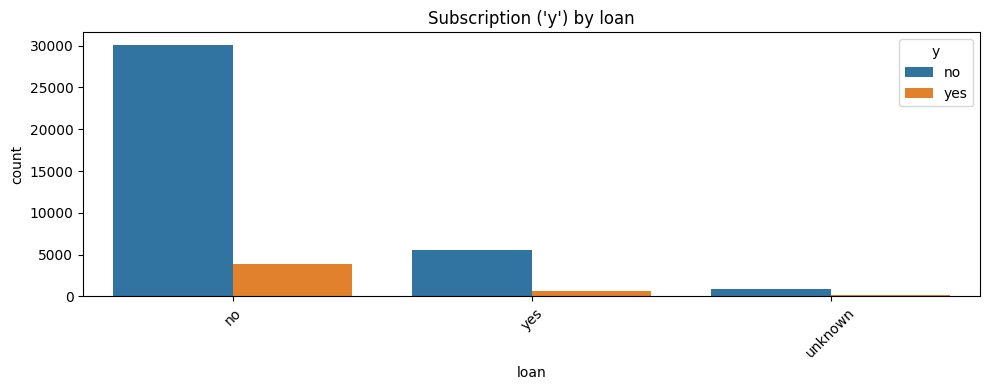

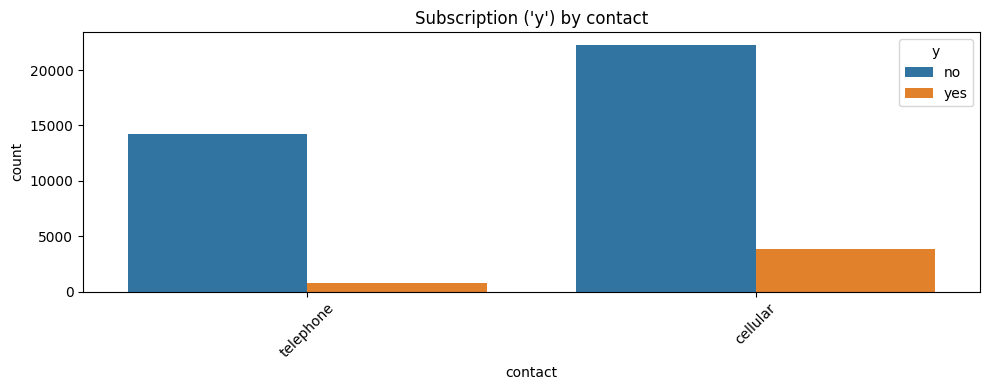

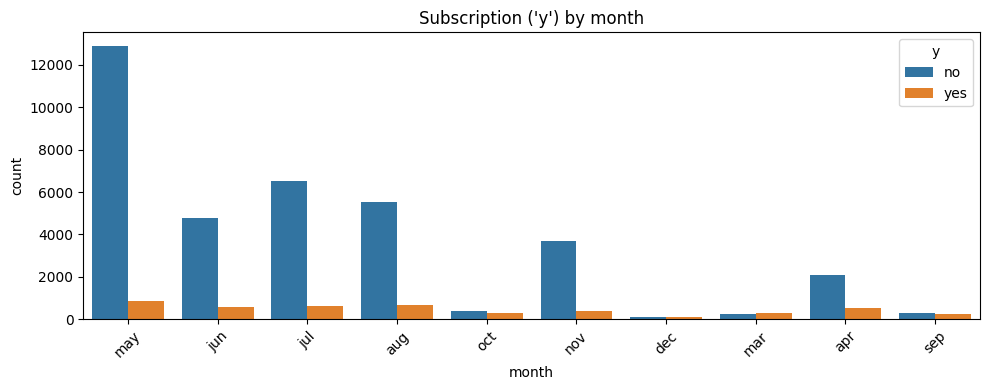

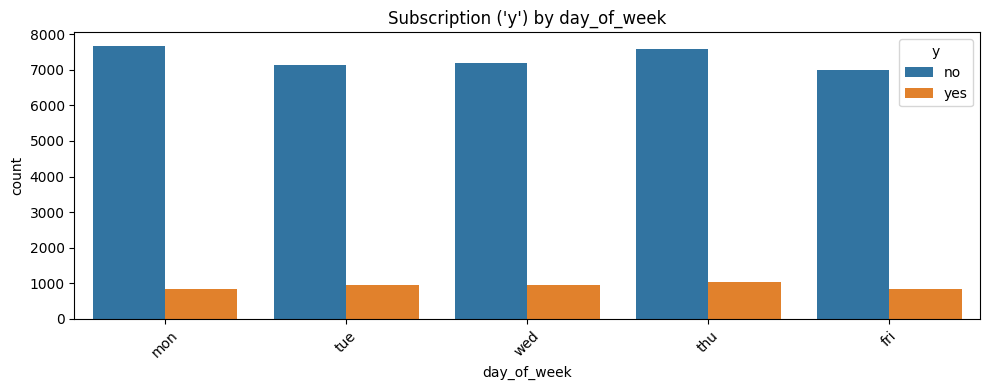

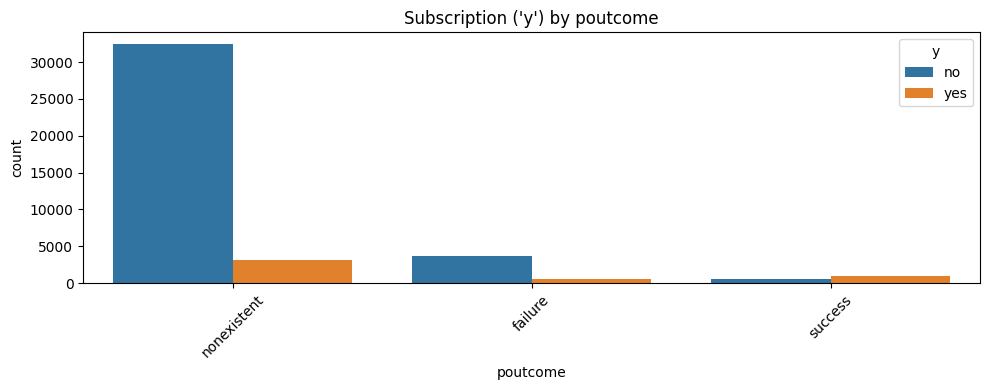

In [22]:
for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, hue='y')
    plt.title(f"Subscription ('y') by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Summary 
The graphs show that students, retired, and management clients are more likely to subscribe. Single and educated people also respond better. Clients without housing or personal loans have higher chances of saying “yes.” Using cellular contact gives better results than telephone. Most subscriptions happen in May, August, and October. People who had success in past campaigns are more likely to subscribe again. Overall, most clients did not subscribe.

### Q.2. Perform the following pre-processing tasks:
#### a. Missing Value Analysis


In [23]:
# In this Dataset not have any actual Nul/Missing Value, but many have “unknown” as a Placeholder for missing data.
for col in df.columns:
    print(col, (df[col] == 'unknown').sum())

age 0
job 330
marital 80
education 1731
default 8597
housing 990
loan 990
contact 0
month 0
day_of_week 0
duration 0
campaign 0
pdays 0
previous 0
poutcome 0
emp.var.rate 0
cons.price.idx 0
cons.conf.idx 0
euribor3m 0
nr.employed 0
y 0


In [25]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].isnull().sum()
# No Missing Value in Numeric Column

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [26]:
df.replace('unknown', pd.NA, inplace=True)
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [29]:
import warnings
warnings.filterwarnings('ignore')
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

In [30]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Analysis for missing values
The dataset does not contain any direct null values, but several columns such as job, education, contact, and poutcome contained the value "unknown", representing missing information. These entries were replaced with NaN and then imputed using the most frequent category (mode). After this process, the dataset had no missing values and was ready for further preprocessing.

#### Q.2) b. Label Encoding wherever required

In [31]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [32]:
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

#### Summary
All text columns were changed into numbers using label encoding so that the data can be used for building machine learning models.

#### Q.2) c. Selecting important features based on Random Forest

In [33]:
X = df.drop('y', axis=1)
y = df['y']

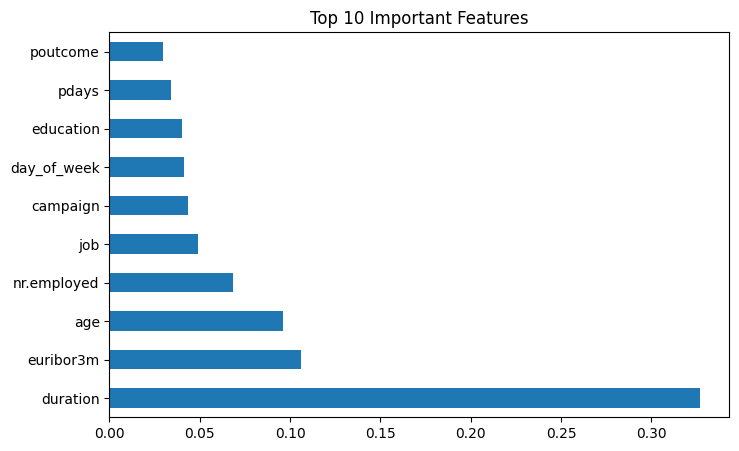

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot Top 10 Features
importances.head(10).plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Important Features")
plt.show()

In [35]:
#Selecting Top 10 Important Features 
important_features = importances.head(10).index
X = X[important_features]

#### Summary 
Random Forest was used to find the most important features in the dataset. Features like duration, nr.employed, emp.var.rate, cons.price.idx, and euribor3m were found to have the biggest impact on whether a client subscribes to a term deposit.

#### Q2) d Handling Unbalanced Data using SMOTE

In [36]:
y.value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [37]:
# Applying SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before SMOTE:\n", y.value_counts())
print("After SMOTE:\n", y_resampled.value_counts())

Before SMOTE:
 y
0    36548
1     4640
Name: count, dtype: int64
After SMOTE:
 y
0    36548
1    36548
Name: count, dtype: int64


#### Summary 
The data had more “no” than “yes” responses. SMOTE was used to balance the data by adding new “yes” samples so both classes have equal numbers.

#### Q.2) e. Standardize the data using any one of the scalers provided by sklearn

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

#### Summary 
The data was standardized using StandardScaler so that all features are on the same scale, which helps models train more efficiently and accurately.

#### Q.3. Build the following Supervised Learning models: 🡪5 marks
##### a. Logistic Regression


In [39]:
# Spliting 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [40]:
# Building and training Logistic Regression Model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [51]:
# Prediction and Accuracy
from sklearn.metrics import accuracy_score

y_pred_lr = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      7332
           1       0.85      0.86      0.85      7288

    accuracy                           0.85     14620
   macro avg       0.85      0.85      0.85     14620
weighted avg       0.85      0.85      0.85     14620



#### Q3)  b. Decision Tree

In [48]:
# Building and Trainning Decision Tree Model
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
# Prediction and Accuracy
y_pred_dt = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7332
           1       0.91      0.93      0.92      7288

    accuracy                           0.92     14620
   macro avg       0.92      0.92      0.92     14620
weighted avg       0.92      0.92      0.92     14620



#### Q3. c. Random Forest

In [53]:
# Building And Trainning Random Forest Model 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
# Prediction and classification Report
y_pred_rf = rf.predict(X_test)
from sklearn.metrics import classification_report

print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      7332
           1       0.93      0.97      0.95      7288

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



#### Q.4. Tabulate the performance metrics of all the above models, perform tuning of models and tell which model performs better in predicting if the client will subscribe to term deposit or not 

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a list of models and their predictions
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
predictions = [y_pred_lr, y_pred_dt, y_pred_rf]

# Store results
results = []

for model_name, y_pred in zip(models, predictions):
    results.append({
        'Model': model_name,
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'Precision': round(precision_score(y_test, y_pred), 4),
        'Recall': round(recall_score(y_test, y_pred), 4),
        'F1-Score': round(f1_score(y_test, y_pred), 4)
    })

# Convert to DataFrame
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.8525     0.8486  0.8569    0.8527
1        Decision Tree    0.9220     0.9144  0.9306    0.9224
2        Random Forest    0.9470     0.9262  0.9710    0.9481


### Summary
All three models were trained and evaluated using accuracy, precision, recall, and F1-score.
Among them, the **Random Forest model achieved the highest accuracy and F1-score**, making it the best-performing model for predicting whether a client will subscribe to a term deposit.